# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [27]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/forecast?id=524901&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={weather_api_key}&units=metric'
    
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        data = city_weather.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = data['city']['coord']['lat']
        city_lng = data['city']['coord']['lon']
        city_max_temp = data['list'][0]['main']['temp_max']
        city_humidity = data['list'][0]['main']['humidity']
        city_clouds = data['list'][0]['clouds']['all']
        city_wind = data['list'][0]['wind']['speed']
        city_country = data['city']['country']
        city_date = data['list'][0]['dt_txt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
  
    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | margaret river
Processing Record 3 of Set 1 | pagar alam
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | saint-pierre
Processing Record 8 of Set 1 | chonchi
Processing Record 9 of Set 1 | westport
Processing Record 10 of Set 1 | dighwara
Processing Record 11 of Set 1 | tazacorte
Processing Record 12 of Set 1 | cervera
Processing Record 13 of Set 1 | piti village
Processing Record 14 of Set 1 | invercargill
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | eastham
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | pisco
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | port lincoln
Processing Record 22 of Set 1 | v

In [29]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [30]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,11.25,63,90,1.90,ZA,2024-10-01 03:00:00
1,margaret river,-33.9500,115.0667,17.44,74,92,2.59,AU,2024-10-01 03:00:00
2,pagar alam,-4.0167,103.2667,28.90,76,50,1.68,ID,2024-10-01 03:00:00
3,adamstown,-25.0660,-130.1015,19.48,66,87,5.36,PN,2024-10-01 03:00:00
4,papatowai,-46.5619,169.4708,15.63,45,98,4.15,NZ,2024-10-01 03:00:00


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,11.25,63,90,1.90,ZA,2024-10-01 03:00:00
1,margaret river,-33.9500,115.0667,17.44,74,92,2.59,AU,2024-10-01 03:00:00
2,pagar alam,-4.0167,103.2667,28.90,76,50,1.68,ID,2024-10-01 03:00:00
3,adamstown,-25.0660,-130.1015,19.48,66,87,5.36,PN,2024-10-01 03:00:00
4,papatowai,-46.5619,169.4708,15.63,45,98,4.15,NZ,2024-10-01 03:00:00


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

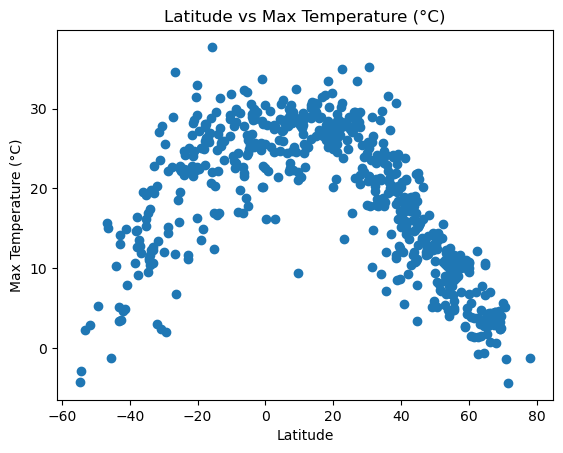

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title("Latitude vs Max Temperature (°C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

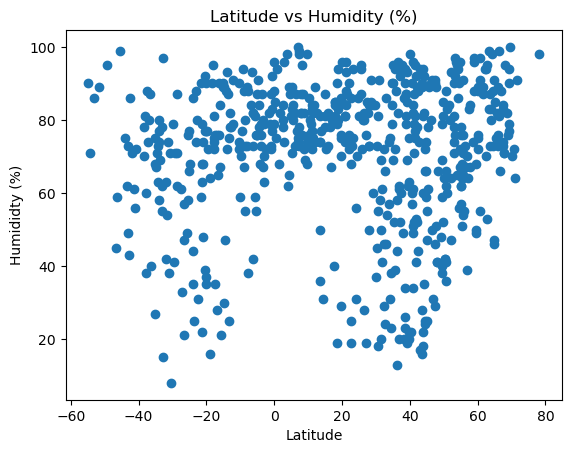

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("Latitude vs Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humididty (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

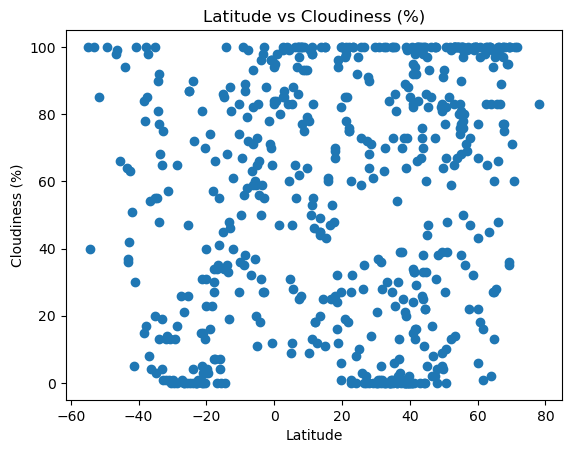

In [48]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

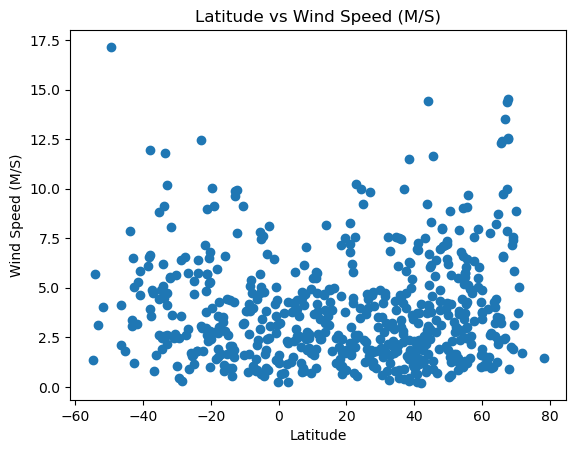

In [49]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])
# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed (M/S)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (M/S)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [50]:
# Define a function to create Linear Regression plots
def lin_reg_plot(data, x_val, y_val):
    valid_data = data.dropna(subset=[x_val, y_val])
    x = valid_data[x_val]
    y = valid_data[y_val]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    plt.scatter(valid_data[x_val], valid_data[y_val])
    plt.plot(x , regress_values, '-r')
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(line_eq,(x.min(),y.max()),fontsize=15,color="red")
    #plt.title(f"{x_val} vs {y_val}")
    plt.xlabel('Latitude')
    if y_val == 'Max Temp':
        plt.ylabel('Max Temperature (°C)')
        plt.title('Latitude vs Max Temperature (°C)')
    elif y_val == 'Cloudiness':
        plt.ylabel('Cloudiness (%)')
        plt.title('Latitude vs Cloudiness (%)')
    elif y_val == "Humidity":
        plt.ylabel('Humidity (%)')
        plt.title('Latitude vs Humidity (%)')
    else:
        plt.ylabel('Wind Speed (M/S)')
        plt.title('Latitude vs Wind Speed (M/S)')


    print(f"The r-squared is: {rvalue**2}")
    plt.show()
    

In [51]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df =city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
8,westport,41.1415,-73.3579,17.25,79,33,3.24,US,2024-10-01 03:00:00
9,dighwara,25.7333,85.0000,28.95,87,59,3.67,IN,2024-10-01 03:00:00
10,tazacorte,28.6290,-17.9293,22.51,85,71,1.83,ES,2024-10-01 03:00:00
11,cervera,41.6700,1.2721,14.59,95,16,2.28,ES,2024-10-01 03:00:00
12,piti village,13.4626,144.6933,30.48,74,45,4.71,GU,2024-10-01 03:00:00


In [52]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,11.25,63,90,1.90,ZA,2024-10-01 03:00:00
1,margaret river,-33.9500,115.0667,17.44,74,92,2.59,AU,2024-10-01 03:00:00
2,pagar alam,-4.0167,103.2667,28.90,76,50,1.68,ID,2024-10-01 03:00:00
3,adamstown,-25.0660,-130.1015,19.48,66,87,5.36,PN,2024-10-01 03:00:00
4,papatowai,-46.5619,169.4708,15.63,45,98,4.15,NZ,2024-10-01 03:00:00


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7514257774506063


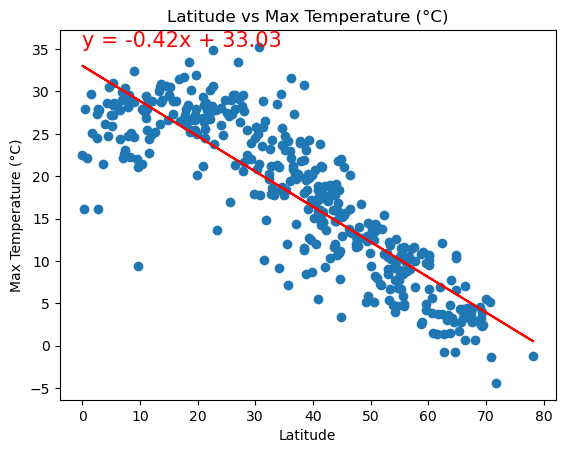

In [53]:
# Linear regression on Northern Hemisphere
lin_reg_plot(northern_hemi_df,'Lat','Max Temp')

The r-squared is: 0.5435433304216043


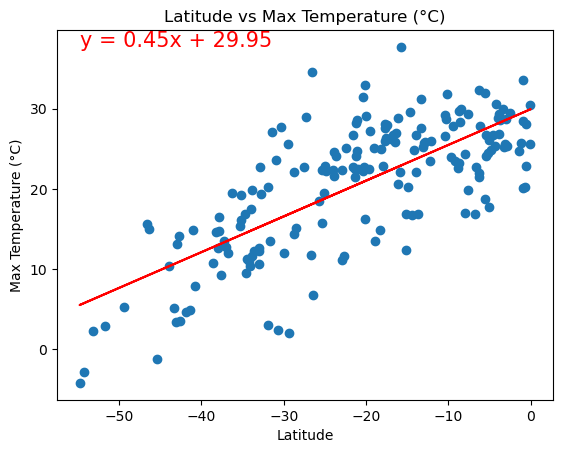

In [54]:
# Linear regression on Southern Hemisphere
lin_reg_plot(southern_hemi_df,'Lat','Max Temp')

**Discussion about the linear relationship:** 
As you get closer to the Equator the max temperature rises

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0025049045769103403


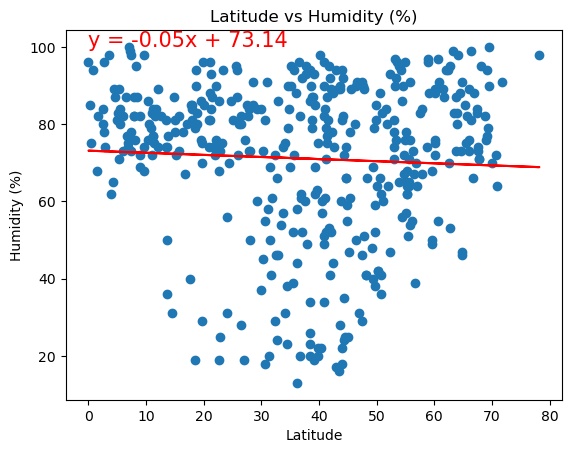

In [55]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df,'Lat','Humidity')

The r-squared is: 0.029383703129557914


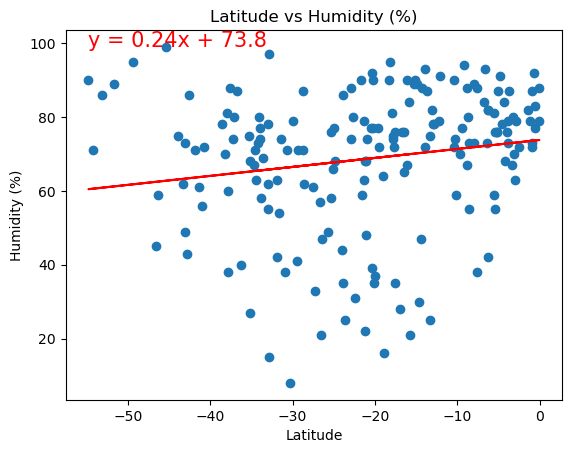

In [56]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df,'Lat','Humidity')

**Discussion about the linear relationship:** 
There doesnt seem to be a correlation between latitude and humidity which surprises me because you would think closer to the equator with the average high temperatures the higher the humidity would be but i guess thats not the case.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.007099157374120888


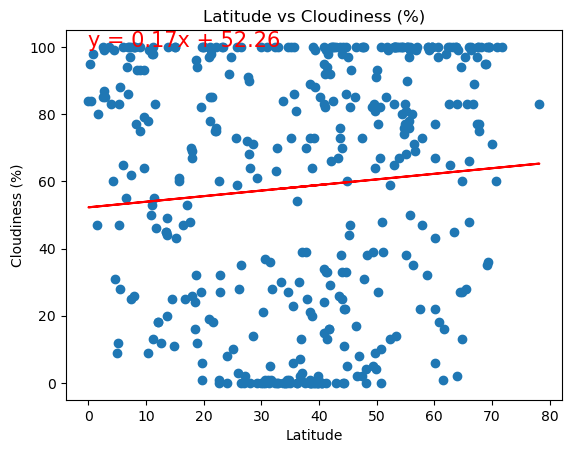

In [57]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df,'Lat', 'Cloudiness')

The r-squared is: 0.007251663062846433


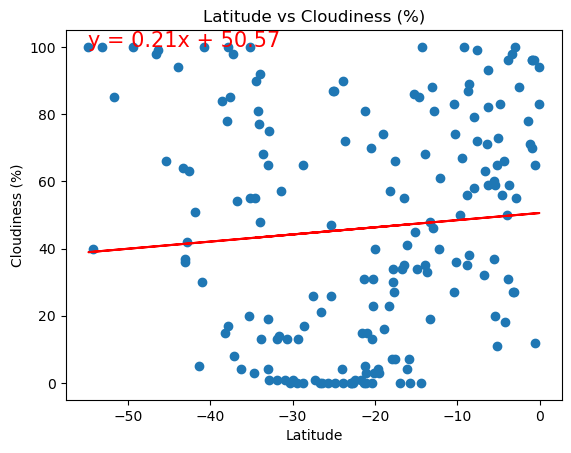

In [45]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df,'Lat','Cloudiness')

**Discussion about the linear relationship:** 
Theres also not a correlation between latitude and cloudiness which is to be expected.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.054050333681048626


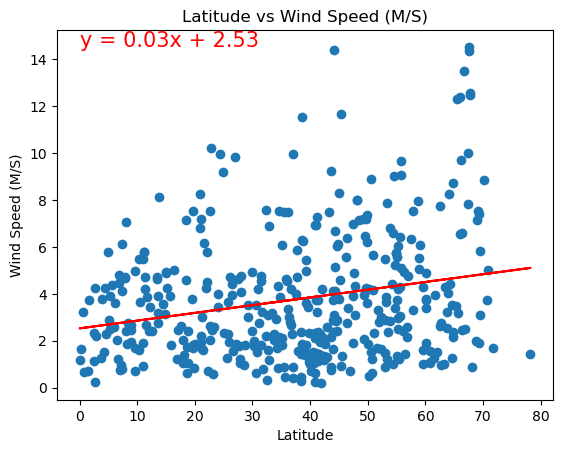

In [46]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df,'Lat','Wind Speed')


The r-squared is: 0.03201474339932904


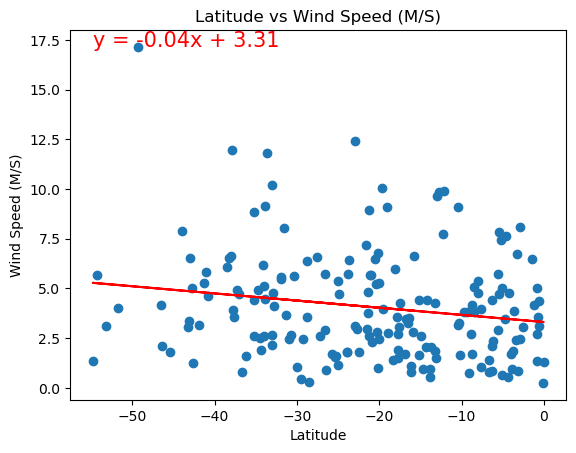

In [47]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df,'Lat','Wind Speed')

**Discussion about the linear relationship:** 
There is a little bit of correlation here but not much, as you get further north and south the wind speed increases but not by much.